# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [72]:
from palmerpenguins import load_penguins
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, cross_val_predict

In [50]:
penguins_df = load_penguins()
penguins_df = penguins_df.dropna()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [51]:
ct = ColumnTransformer(
    [
        ('dummify', OneHotEncoder(sparse_output= False,
        handle_unknown= 'ignore', drop='first'), make_column_selector(dtype_include=object)),
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder = 'drop'
).set_output(transform='pandas')

dummy_pipeline = Pipeline(
    [
        ('preprocessing', ct)

    ]
)

X = penguins_df.drop(["species"], axis = 1)
y = penguins_df["species"]

dummy_pipeline.fit(X)

names = dummy_pipeline.named_steps["preprocessing"].get_feature_names_out()
names

array(['dummify__island_Dream', 'dummify__island_Torgersen',
       'dummify__sex_male', 'standardize__bill_length_mm',
       'standardize__bill_depth_mm', 'standardize__flipper_length_mm',
       'standardize__body_mass_g', 'standardize__year'], dtype=object)

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [52]:
X = penguins_df.drop(["species"], axis = 1)
y = penguins_df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state= 40)

## KNN k=3

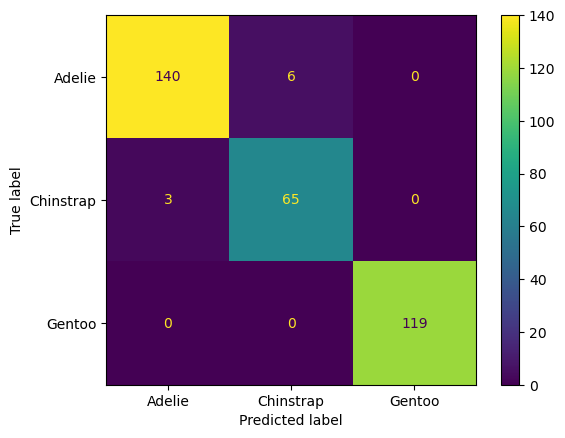

In [57]:
knn3_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("knn3", KNeighborsClassifier(n_neighbors= 3))
    ]
).set_output(transform="pandas")

knn3_model = knn3_pipeline.fit(X_train, y_train)

y_pred_knn3 = cross_val_predict(knn3_pipeline, X, y, cv=5)
conf_matrix = confusion_matrix(y, y_pred_knn3)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y)).plot()

In [59]:
accuracy_score(y,y_pred_knn3)

0.972972972972973

In [66]:
knn3_class_report = classification_report(y, y_pred_knn3)
print(knn3_class_report)

              precision    recall  f1-score   support

      Adelie       0.98      0.96      0.97       146
   Chinstrap       0.92      0.96      0.94        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           0.97       333
   macro avg       0.96      0.97      0.97       333
weighted avg       0.97      0.97      0.97       333



## KNN k=10

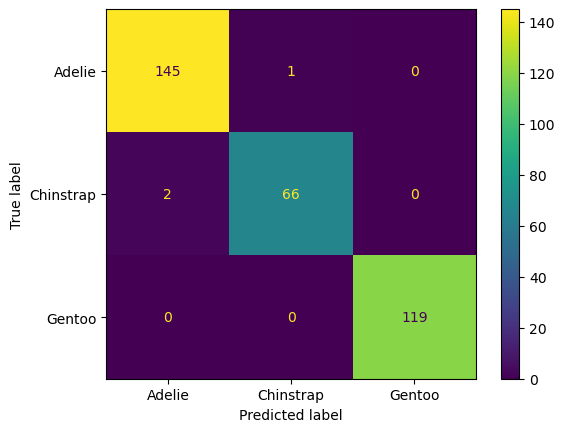

In [63]:
knn10_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("knn10", KNeighborsClassifier(n_neighbors= 10))
    ]
).set_output(transform="pandas")

knn10_model = knn10_pipeline.fit(X_train, y_train)

y_pred_knn10 = cross_val_predict(knn10_pipeline, X, y, cv=5)
conf_matrix = confusion_matrix(y, y_pred_knn10)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y)).plot()

In [64]:
accuracy_score(y,y_pred_knn10)

0.990990990990991

In [67]:
knn10_class_report = classification_report(y, y_pred_knn10)
print(knn10_class_report)

              precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99       146
   Chinstrap       0.99      0.97      0.98        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           0.99       333
   macro avg       0.99      0.99      0.99       333
weighted avg       0.99      0.99      0.99       333



## Decision Tree 1

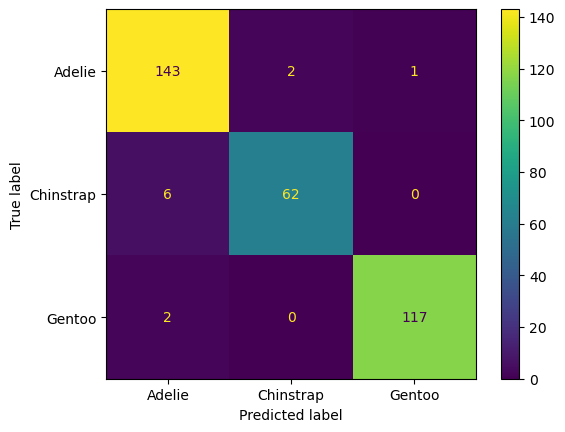

In [73]:
decision1_pipeline = Pipeline([
    ("preprocessing", ct),
    ("tree", DecisionTreeClassifier(max_depth = 3))
])

decision_tree1_model = decision1_pipeline.fit(X_train, y_train)

y_pred_tree1 = cross_val_predict(decision1_pipeline, X, y, cv=5)
conf_matrix = confusion_matrix(y, y_pred_tree1)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y)).plot()

In [74]:
accuracy_score(y,y_pred_tree1)

0.9669669669669669

In [75]:
tree1_class_report = classification_report(y, y_pred_tree1)
print(tree1_class_report)

              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96       146
   Chinstrap       0.97      0.91      0.94        68
      Gentoo       0.99      0.98      0.99       119

    accuracy                           0.97       333
   macro avg       0.97      0.96      0.96       333
weighted avg       0.97      0.97      0.97       333



## Decision Tree 2

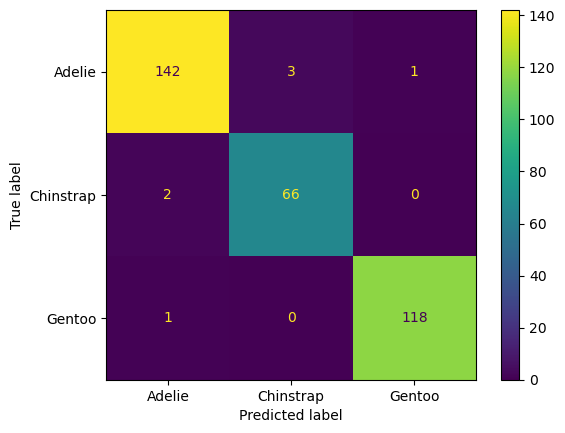

In [76]:
decision2_pipeline = Pipeline([
    ("preprocessing", ct),
    ("decision_tree", DecisionTreeClassifier(max_depth = 10))
])

decision_tree2_model = decision2_pipeline.fit(X_train, y_train)

y_pred_tree2 = cross_val_predict(decision2_pipeline, X, y, cv=5)
conf_matrix = confusion_matrix(y, y_pred_tree2)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y)).plot()

In [77]:
accuracy_score(y,y_pred_tree2)

0.978978978978979

In [79]:
tree2_class_report = classification_report(y, y_pred_tree2)
print(tree2_class_report)

              precision    recall  f1-score   support

      Adelie       0.98      0.97      0.98       146
   Chinstrap       0.96      0.97      0.96        68
      Gentoo       0.99      0.99      0.99       119

    accuracy                           0.98       333
   macro avg       0.98      0.98      0.98       333
weighted avg       0.98      0.98      0.98       333



# ROC

In [94]:
y_gentoo = (y == "Gentoo")

#decision tree2
prob_tree2 = cross_val_predict(decision2_pipeline, X, y_gentoo, cv=5, method="predict_proba")[:, 1]

fpr_tree2, tpr_tree2, _ = roc_curve(y_gentoo, prob_tree2)
AUC_tree2 = roc_auc_score(y_gentoo, prob_tree2)

#decision tree1
prob_tree1 = cross_val_predict(decision1_pipeline, X, y_gentoo, cv=5, method="predict_proba")[:, 1]

fpr_tree1, tpr_tree1, _ = roc_curve(y_gentoo, prob_tree1)
AUC_tree1 = roc_auc_score(y_gentoo, prob_tree1)

#knn3
prob_knn3 = cross_val_predict(knn3_pipeline, X, y_gentoo, cv=5, method="predict_proba")[:, 1]

fpr_knn3, tpr_knn3, _ = roc_curve(y_gentoo, prob_knn3)
AUC_knn3 = roc_auc_score(y_gentoo, prob_knn3)

#knn10
prob_knn10 = cross_val_predict(knn10_pipeline, X, y_gentoo, cv=5, method="predict_proba")[:, 1]

fpr_knn10, tpr_knn10, _ = roc_curve(y_gentoo, prob_knn10)
AUC_knn10 = roc_auc_score(y_gentoo, prob_knn10)

roc_table = pd.DataFrame({
    'FPR': np.concatenate([fpr_knn3, fpr_knn10, fpr_tree1, fpr_tree2]),
    'TPR': np.concatenate([tpr_knn3, tpr_knn10, tpr_tree1, tpr_tree2]),
    'Model': ['KNN k=3'] * len(fpr_knn3) + ['KNN k=10'] * len(fpr_knn10) +
             ['Decision Tree=3'] * len(fpr_tree1) + ['Decision Tree=10'] * len(fpr_tree2)
})

roc_table

,FPR,TPR,Model
0,0.000000,0.000000,KNN k=3
1,0.000000,1.000000,KNN k=3
2,1.000000,1.000000,KNN k=3
3,0.000000,0.000000,KNN k=10
4,0.000000,1.000000,KNN k=10
5,0.014019,1.000000,KNN k=10
6,1.000000,1.000000,KNN k=10
7,0.000000,0.000000,Decision Tree=3
8,0.004673,0.991597,Decision Tree=3
9,1.000000,1.000000,Decision Tree=3


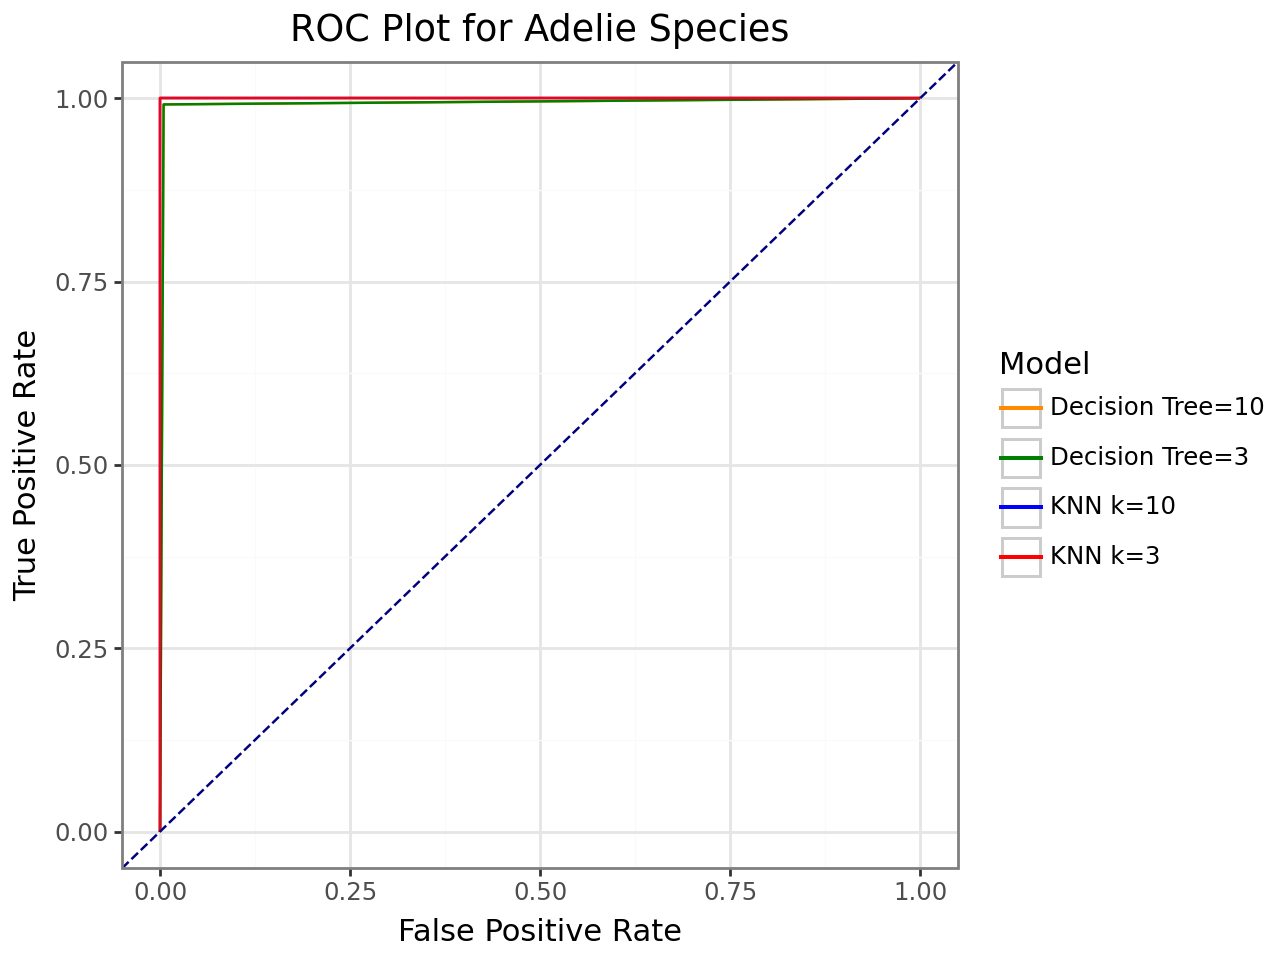

In [96]:
from plotnine import *

(ggplot(roc_table, aes(x='FPR', y='TPR', color='Model')) +
    geom_line() + geom_abline(linetype='dashed', color='navy') +
    labs(title='ROC Plot for Adelie Species',
         x='False Positive Rate',
         y='True Positive Rate') +
    theme_bw() +
    scale_color_manual(values=['darkorange', 'green', 'blue', 'red'])
)